## Imports for the Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import stats

# Reading in the Data

In [10]:
# DataFrame for Crime Data Between 1996-2007
df1 = pd.read_csv('seattle_data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
# DataFrame for Crime Data from 2008-Present
df2 = pd.read_csv('seattle_data/seattle-crime-stats-by-police-precinct-2008-present.csv')

#### What kinds of information does each set of years tell us?
To do this, let's take a look at the top 5 rows of each DataFrame.

In [11]:
df1.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [12]:
df2.head()

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


# Purpose of the Analysis

The goal of this exploratory data analysis is to understand trends in crime for the City of Seattle over roughly the past 24 years. The outcome of asking and seeking this answers about this data will hopefully help lead us to make suggestions for how urban communities in Seattle and elsewhere can improve.

## Question 1: How has the amount of crime in Seattle changed over the years 1996-Present?

In [107]:
def count_annual_crimes(df):
    """Return a dict of all the years in a DataFrame, with the total number of crimes that occured in that year."""
    # figure out which df we have, and which years we have data for in the df
    if 'Report_Year' in df.columns:
        years = df['Report_Year'].unique()
    else:
        reported_years = pd.Series([int(date[:4]) for date in df['REPORT_DATE']])
        years = sorted(reported_years.unique())
    # iterate over rows of dataset, and count up the total crimes in each year
    year_crimes = dict()
    # separate algorithms for one df over the other
    
    # condition for 1996-2007
    if 'Report_Year' in df.columns:
        for index, year in enumerate(years):
            # grab all the rows with this year, and sum crime numbers
            crimes_ls = (df.loc[df['Report_Year'] == year])['Report_Year_Total'].dropna()
            # print(crimes_ls)
            crimes = sum([int(crime) for crime in crimes_ls])
            year_crimes[year] = crimes
    # condition for 2008-present
    else:
        for year in years:
            crimes = len([date for date in df['REPORT_DATE'].dropna().values if str(year) in date])
            year_crimes[year] = crimes
    return year_crimes


annual_crimes_1996 = count_annual_crimes(df1)
annual_crimes_2008 = count_annual_crimes(df2)
# combine the two dictionaries
annual_crime_counts = annual_crimes_1996.copy()
annual_crime_counts.update(annual_crimes_2008)

Line Graph Representation

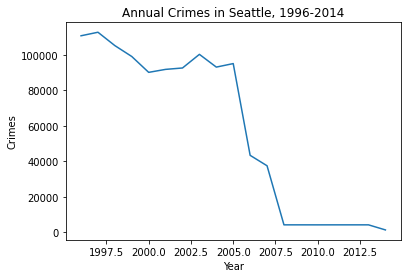

In [111]:
years, annual_crimes = (
    list(annual_crime_counts.keys()),
    list(annual_crime_counts.values())
)
plt.title("Annual Crimes in Seattle, 1996-2014")
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.plot(years, annual_crimes)
plt.show()

# Final Conclusions

1. Fortunately from the City of Seattle has seen a decrease in annual crimes from 1996-2014, by orders of magnitude.